🎯 Desafio dia 72 — Monitoramento de Glicemia em Pacientes Diabéticos

📂 Dataset: desafio_dia_72_glicemia_pacientes.csv

🔍 Contexto: Você está em um projeto de monitoramento de saúde voltado para pessoas com diabetes. O objetivo é analisar padrões de glicemia e entender o impacto de hábitos como atividade física.

🛠️ Tarefas do desafio:

Tratamento de dados

- Preencha os valores ausentes de nivel_glicose com a média da coluna.

- Preencha os valores ausentes de atividade_fisica com o valor mais frequente (moda).

Análise geral

- Qual a média de glicose por faixa etária?

- Pacientes que fazem atividade física têm menor média de glicose?

Visualização de dados

- Crie um boxplot do nível de glicose por momento de medição (momento_medicao).

Machine Learning - Classificação

- Crie um modelo para prever se um paciente fez atividade física com base nas variáveis:

    nivel_glicose, faixa_etaria, sexo, momento_medicao

    Use RandomForestClassifier, train_test_split e pd.get_dummies.

    Avalie o modelo com accuracy_score.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
df = pd.read_csv("desafio_dia_72_glicemia_pacientes.csv")
df.head()

,id_paciente,sexo,faixa_etaria,nivel_glicose,momento_medicao,atividade_fisica
0,10472,Masculino,18-30,63.1,Antes do café,Sim
1,10787,Feminino,18-30,111.6,Antes do café,Não
2,10046,Masculino,46-60,138.0,Depois do almoço,Sim
3,10074,Feminino,31-45,79.0,Antes do café,Não
4,10869,Masculino,31-45,127.5,Depois do almoço,Sim


In [20]:
#Preencha os valores ausentes de nivel_glicose com a média da coluna.
df["nivel_glicose"] = df["nivel_glicose"].fillna(df["nivel_glicose"].mean())
df["nivel_glicose"].isna().sum()

np.int64(0)

In [21]:
#Preencha os valores ausentes de atividade_fisica com o valor mais frequente (moda).
df["atividade_fisica"] = df["atividade_fisica"].fillna(df["atividade_fisica"].mode()[0])
df["atividade_fisica"].isna().sum()

np.int64(0)

In [8]:
#Qual a média de glicose por faixa etária?
media_glicose_faixa_etaria = df.groupby("faixa_etaria")["nivel_glicose"].mean().sort_values(ascending=False)
print(media_glicose_faixa_etaria)

faixa_etaria
61+      113.609169
46-60    113.110085
18-30    111.143736
31-45    107.143834
Name: nivel_glicose, dtype: float64


In [10]:
#Pacientes que fazem atividade física têm menor média de glicose?
atividade_fisica_glicose = df.groupby("atividade_fisica")["nivel_glicose"].mean().sort_values(ascending=False)
print(atividade_fisica_glicose)

atividade_fisica
Não    112.001557
Sim    109.349810
Name: nivel_glicose, dtype: float64


Text(0.5, 0, 'Momento da Medição')

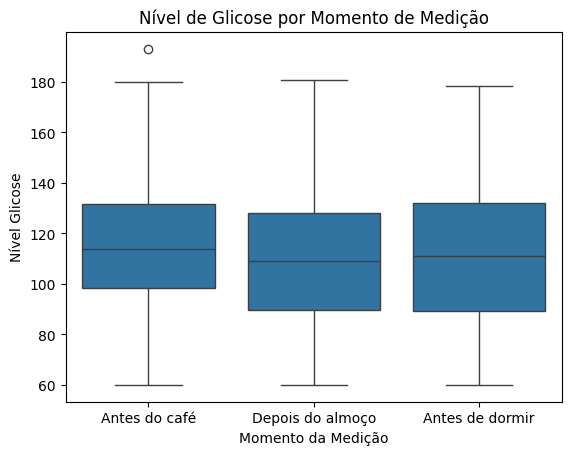

In [13]:
#Crie um boxplot do nível de glicose por momento de medição (momento_medicao).
sns.boxplot(df, x="momento_medicao", y="nivel_glicose")
plt.title("Nível de Glicose por Momento de Medição")
plt.ylabel("Nível Glicose")
plt.xlabel("Momento da Medição")

In [25]:
#Crie um modelo para prever se um paciente fez atividade física com base nas variáveis:
X = df[["nivel_glicose", "faixa_etaria", "sexo", "momento_medicao"]]
y = df["atividade_fisica"]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5217391304347826
